### Python module/package imports for this chapter

In [1]:
import os, sys, collections, re, json, io, base64

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
import requests
import bs4      # BeautifulSoup 4

In [4]:
import IPython.display
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance  # Python Imaging Library - now "pillow"

## Making a Martian roll-through with `matplotlib`

In [5]:
open('resources/locations.xml','r').readlines()[:19]

['<msl>\n',
 '  <location>\n',
 '    <site>00000</site>\n',
 '    <itemName>0000000000</itemName>\n',
 '    <lon>137.4416334989196</lon>\n',
 '    <rot>0.014572, -0.034982, 0.831579, 0.554112</rot>\n',
 '    <endSol>00000</endSol>\n',
 '    <dateAdded>2016-11-21T15:55:00Z</dateAdded>\n',
 '    <startSol>00000</startSol>\n',
 '    <arrivalTime>2012-08-05T13:49:59Z</arrivalTime>\n',
 '    <mapPixelH>82253.03164549096</mapPixelH>\n',
 '    <contributor>Team MSLICE</contributor>\n',
 '    <drive>00000</drive>\n',
 '    <mapPixelV>123500.99039381815</mapPixelV>\n',
 '    <z>0.0</z>\n',
 '    <y>0.0</y>\n',
 '    <lat>-4.5894669521344875</lat>\n',
 '    <x>0.0</x>\n',
 '  </location>\n']

In [9]:
xml = bs4.BeautifulSoup(open('resources/locations.xml','r'),'lxml-xml')
locations = xml.find_all('locations')

In [10]:
coords = collections.OrderedDict()

for location in locations:
    coords[location.site.string] = (float(location.lon.string),float(location.lat.string))

In [12]:
lonlat = np.fromiter(coords.values(),dtype = [('lon','d'),('lat','d')])

/Users/kthomas1/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/kthomas1/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/kthomas1/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/kthomas1/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


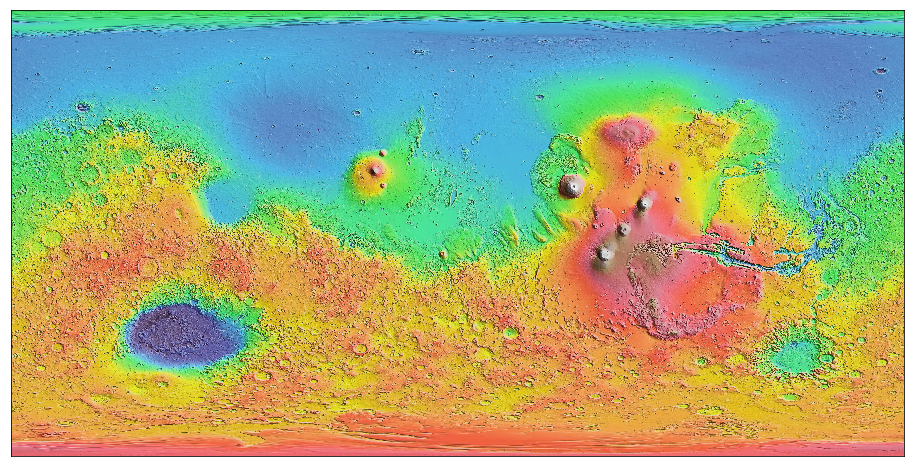

In [14]:
mars = PIL.Image.open('resources/mars_cylindrical.jpg')

pp.figure(figsize=(16,10))

world = Basemap(lon_0 = 180)

world.imshow(mars,origin='upper')
world.plot(lonlat['lon'],lonlat['lat'],'r.',ms=15,latlon=True)